#### S Tseng implementation of a random number generator and then used in random walk simulations

This was part of an assignment for a programming for engineers module at the University of Twente

In [4]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline

### Random Number Generator 

In [5]:
class RNG():
    def __init__(self,seed=199,c=75,p=2**16+1):
        self.seed = seed
        self.x = seed
        self.c = c
        self.p = p
    
    # Return a random integer
    def rand_int(self):
        self.x = (self.c*self.x)%self.p
        return self.x
    
    # Return n random integers
    def rand_ints(self,n=1):
        numbers = []
        for i in range(0,n):
            numbers.append(self.rand_int())
        return numbers
    
    # Return a random number between 0 and 1
    def rand(self):
        self.rand_int()
        return self.x/self.p
    
    # Return n random numbers between 0 and 1
    def rands(self,n=1):
        numbers = []
        for i in range(0,n):
            numbers.append(self.rand())
        return numbers

## Exercise 3 - Random Walk

### 3.1 Initial Set Up and Simulations

In [6]:
steps=2**20
x_0=0
fs=15
plt.rc('font',family='serif')

In [18]:
RNG().rand_int()

14925

#### Random Number Generator 1 (RNG1)

In [7]:
R=RNG(seed=5,c=3,p=2**5-1)

In [13]:
X1=np.array(R.rands(5))
X1[X1<0.5]=-1
X1[X1!=-1]=1
X1=np.cumsum(X1)

X1=np.concatenate((np.array([x_0]),X1),0)

In [14]:
X1

array([0., 1., 2., 3., 4., 5.])

In [11]:
X1=np.array(R.rands(steps))
X1[X1<0.5]=-1
X1[X1!=-1]=1
X1=np.cumsum(X1)

X1=np.concatenate((np.array([x_0]),X1),0)

#### Random Number Generator 2 (RNG2)

In [7]:
R=RNG(seed=199,c=75,p=2**16+1)

In [8]:
X2=np.array(R.rands(steps))
X2[X2<0.5]=-1
X2[X2!=-1]=1
X2=np.cumsum(X2)
X2=np.concatenate((np.array([x_0]),X2),0)

#### Plot of all $2^{20}$ time steps

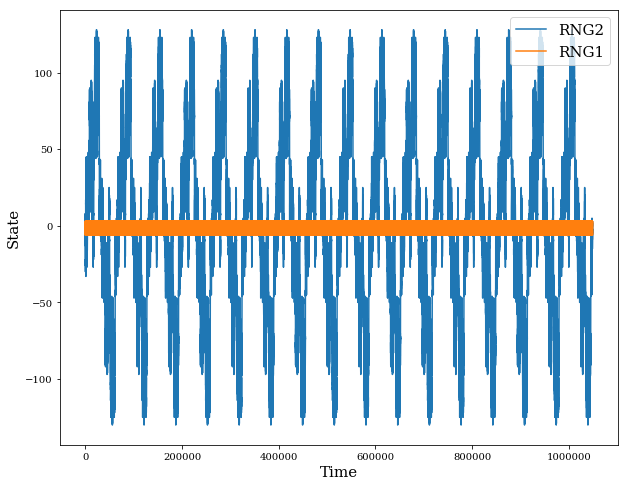

In [20]:
plt.figure(num=None,figsize=(10,8))
t=np.arange(0,len(X1))
plt.plot(t,X2,label='RNG2')
plt.plot(t,X1,label='RNG1')
plt.xlabel('Time',fontsize=fs)
plt.ylabel('State',fontsize=fs)
plt.legend(fontsize=fs,loc=1);

#### Plot of first $2^{16}+1$ time steps

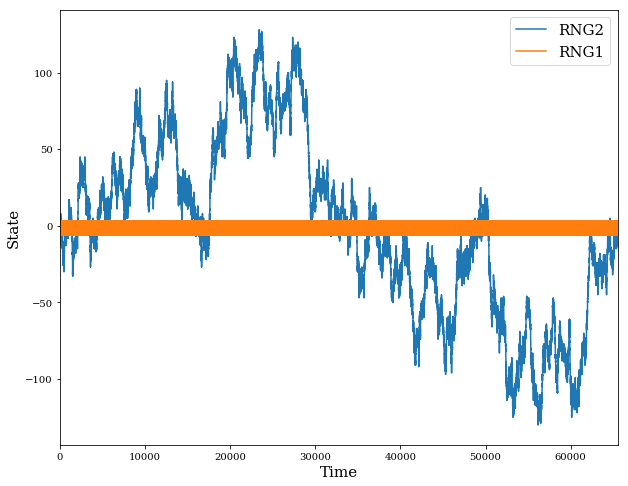

In [22]:
plt.figure(num=None,figsize=(10,8))
plt.plot(t,X2,label='RNG2')
plt.plot(t,X1,label='RNG1')
plt.xlim(0,2**16+1)
plt.xlabel('Time',fontsize=fs)
plt.ylabel('State',fontsize=fs)
plt.legend(fontsize=fs,loc=1);

#### Plot of first 200 time steps

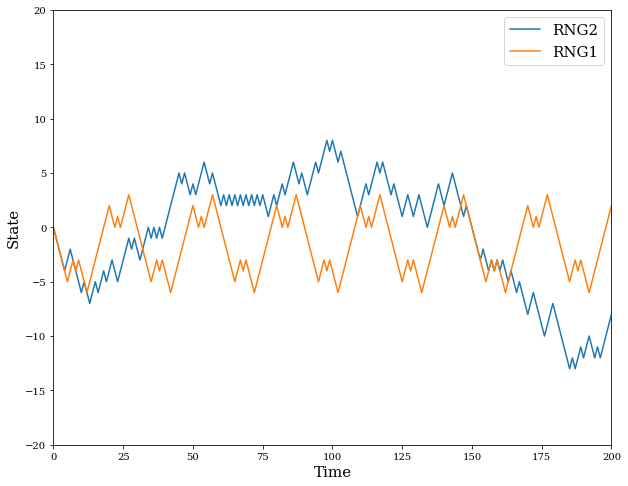

In [23]:
plt.figure(num=None,figsize=(10,8))
plt.plot(t,X2,label='RNG2')
plt.plot(t,X1,label='RNG1')
plt.xlim(0,200)
plt.ylim(-20,20)
plt.xlabel('Time',fontsize=fs)
plt.ylabel('State',fontsize=fs)
plt.legend(fontsize=fs,loc=1);

### 3.2 Computing $\langle x \rangle$ and $\langle x^{2} \rangle$ 

##### Note:

The p value chosen for RNG2, $2^{16}+1$ is too close to being a factor of $2^{20}$. Hence, the results aren't interesting when a few hundred simulations are done due to the periodicity of RNG2. 

Thus, for computing $\langle x \rangle$ and $\langle x^2 \rangle$, int($2^{20.21}$)+3 = **1,212,878** steps were used instead of $2^{20}$. 

In [7]:
steps=int(2**20.21)+3
N=300 # Number of simulations

In [8]:
R=RNG(seed=199,c=75,p=2**16+1)
Sims2=[]
Sims2_SQ=[]
for j in range(0,N):
    X2=np.array(R.rands(steps))
    X2[X2<0.5]=-1
    X2[X2!=-1]=1
    X2=np.cumsum(X2)
    X2=np.concatenate((np.array([x_0]),X2),0)
    Sims2.append(X2)
    Sims2_SQ.append(X2**2)

In [9]:
R=RNG(seed=5,c=3,p=2**5-1)
Sims1=[]
Sims1_SQ=[]
for j in range(0,N):
    X1=np.array(R.rands(steps))
    X1[X1<0.5]=-1
    X1[X1!=-1]=1
    X1=np.cumsum(X1)
    X1=np.concatenate((np.array([x_0]),X1),0)
    Sims1.append(X1)
    Sims1_SQ.append(X1**2)

In [10]:
Sims1=np.array(Sims1)
Sims2=np.array(Sims2)
Exp_X1=np.sum(Sims1,0)/N
Exp_X2=np.sum(Sims2,0)/N

In [11]:
Sims1_SQ=np.array(Sims1_SQ)
Sims2_SQ=np.array(Sims2_SQ)
Exp_X1_SQ=np.sum(Sims1_SQ,0)/N
Exp_X2_SQ=np.sum(Sims2_SQ,0)/N

#### Plot of $\langle x \rangle$ 

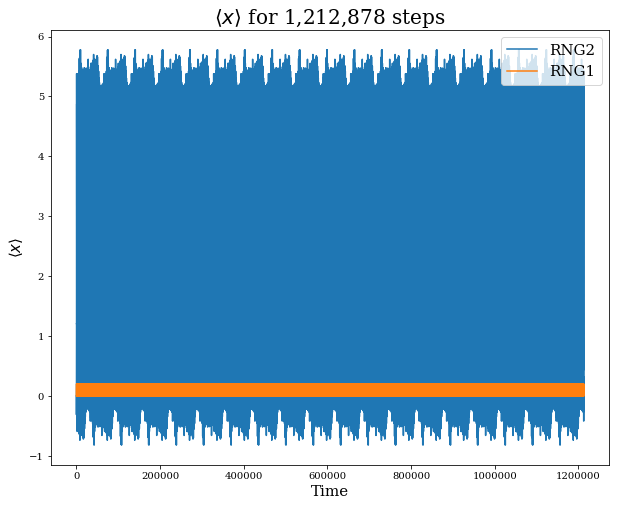

In [33]:
plt.figure(num=None,figsize=(10,8))
t=np.arange(0,len(Exp_X1))
plt.plot(t,Exp_X2,label='RNG2')
plt.plot(t,Exp_X1,label='RNG1')
plt.xlabel('Time',fontsize=fs)
plt.ylabel(r'$\langle x \rangle$',fontsize=fs)
plt.title(r'$\langle x \rangle$ for 1,212,878 steps',fontsize=fs+5)
plt.legend(fontsize=fs,loc=1);

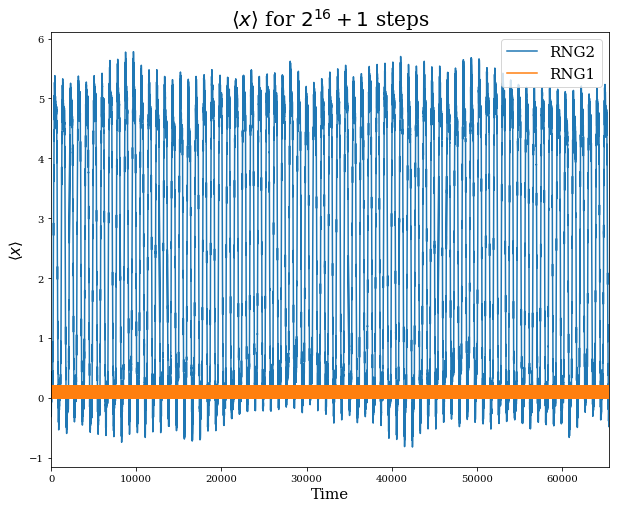

In [34]:
plt.figure(num=None,figsize=(10,8))
plt.plot(t,Exp_X2,label='RNG2')
plt.plot(t,Exp_X1,label='RNG1')
plt.xlabel('Time',fontsize=fs)
plt.ylabel(r'$\langle x \rangle$',fontsize=fs)
plt.title(r'$\langle x \rangle$ for $2^{16}+1$ steps',fontsize=fs+5)
plt.xlim(0,2**16+1)
plt.legend(fontsize=fs,loc=1);

#### Plot of $\langle x^2 \rangle$ 

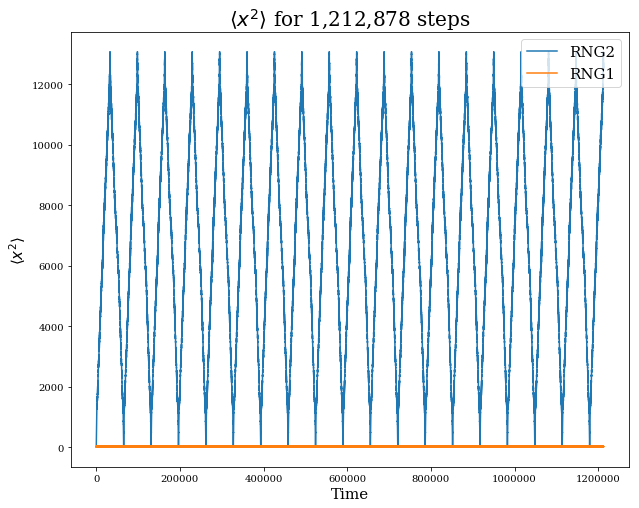

In [35]:
plt.figure(num=None,figsize=(10,8))
t=np.arange(0,len(Exp_X1_SQ))
plt.plot(t,Exp_X2_SQ,label='RNG2')
plt.plot(t,Exp_X1_SQ,label='RNG1')
plt.xlabel('Time',fontsize=fs)
plt.ylabel(r'$\langle x^2 \rangle$',fontsize=fs)
plt.title(r'$\langle x^2 \rangle$ for 1,212,878 steps',fontsize=fs+5)
plt.legend(fontsize=fs,loc=1);

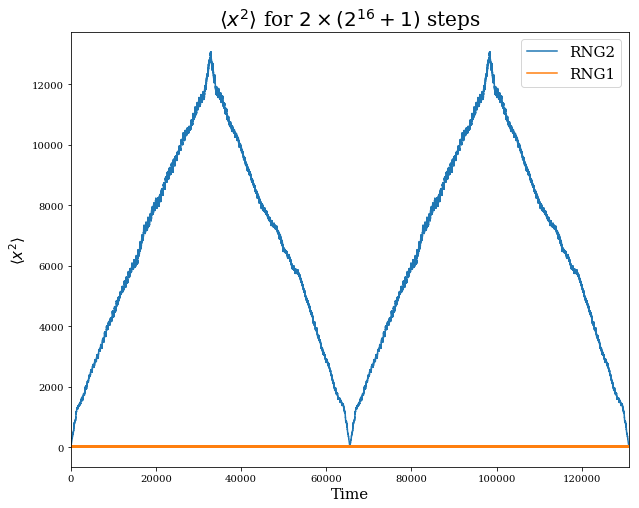

In [36]:
plt.figure(num=None,figsize=(10,8))
t=np.arange(0,len(Exp_X1_SQ))
plt.plot(t,Exp_X2_SQ,label='RNG2')
plt.plot(t,Exp_X1_SQ,label='RNG1')
plt.xlabel('Time',fontsize=fs)
plt.ylabel(r'$\langle x^2 \rangle$',fontsize=fs)
plt.title(r'$\langle x^2 \rangle$ for $2 \times (2^{16}+1)$ steps',fontsize=fs+5)
plt.xlim(0,2*(2**16+1))
plt.legend(fontsize=fs,loc=1);

### 3.3 Diffusion Coefficient of a Simple Random Walk

$p = 0.5$ 

$q = 1 - p = 0.5$

$\Delta x = \Delta t = 1$

$D = \frac{2pq(\Delta x)^2}{\Delta t} = 0.5$

### 3.4 Final States of 500 Simulations after 1,212,878 steps

In [9]:
N=500
steps=int(2**20.21)+3

In [205]:
R=RNG(seed=5,c=3,p=2**5-1)
Sims1=[]
for j in range(0,N):
    X1=np.array(R.rands(steps))
    X1[X1<0.5]=-1
    X1[X1!=-1]=1
    Sims1.append(np.sum(X1))

In [10]:
R=RNG(seed=199,c=75,p=2**16+1)
Sims2=[]
for j in range(0,N):
    X2=np.array(R.rands(steps))
    X2[X2<0.5]=-1
    X2[X2!=-1]=1
    Sims2.append(np.sum(X2))

#### Fitting a Gaussian Function to RNG1 Probability Distribution

''

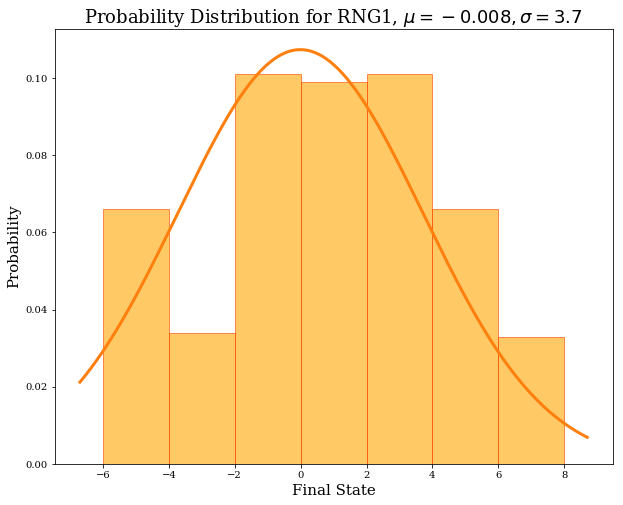

In [297]:
plt.figure(num=None,figsize=(10,8))
plt.title('Probability Distribution for RNG1',fontsize=fs+5)
plt.xlabel('Final State',fontsize=fs)
plt.ylabel('Probability',fontsize=fs)
n,bins,patches=plt.hist(Sims1,bins=7,facecolor='orange',density=True,alpha=0.6,edgecolor='orangered')
Xmin,Xmax=plt.xlim()
mu,sigma=norm.fit(Sims1)
X=np.linspace(Xmin,Xmax,1000)
G=norm.pdf(X,mu,sigma)
plt.plot(X,G,linewidth=3)
plt.title(r'Probability Distribution for RNG1, $\mu = %.3f, \sigma = %.1f$'%(mu,sigma),fontsize=fs+3)
;

#### Fitting a Gaussian Function to RNG2 Probability Distribution

''

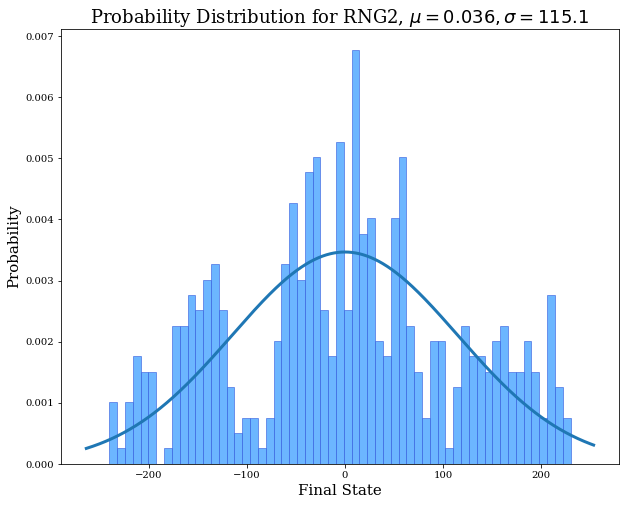

In [11]:
plt.figure(num=None,figsize=(10,8))
plt.xlabel('Final State',fontsize=fs)
plt.ylabel('Probability',fontsize=fs)
n,bins,patches=plt.hist(Sims2,bins=int(len(np.unique(Sims2))/3),density=True,alpha=0.65,edgecolor='royalblue',color='dodgerblue')
Xmin,Xmax=plt.xlim()
mu,sigma=norm.fit(Sims2)
X=np.linspace(Xmin,Xmax,1000)
G=norm.pdf(X,mu,sigma)
plt.plot(X,G,linewidth=3)
plt.title(r'Probability Distribution for RNG2, $\mu = %.3f, \sigma = %.1f$'%(mu,sigma),fontsize=fs+3);

In terms of the width of the Gaussian in relation to the distribution, the larger the width of the Gaussian, the larger the variance of the final states (or data). Hence, a wide Gaussian has final states that are highly varied with a large variance (e.g., RNG2), whereas, a narrow Gaussian would have final states that are less varied with a smaller variance (e.g., RNG1).

### 3.5 Diffusion Equation 

The diffusion or heat equation on the line $-\infty \lt x \lt \infty$ and with $0 \leq t \lt t_{max}$ has the Gaussian function as solution.
 
$\frac{\partial u}{\partial t} = \frac{\sigma ^2}{2} \frac{\partial ^2 u}{\partial x^2},$

$u(x,0) = x_0 = 0,$

where $\sigma = 3.7$ for RNG1 and $\sigma = 115.1$ for RNG2. 